In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


In [5]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Dense , Conv2D , Flatten , MaxPooling2D , Dropout

In [8]:
from tensorflow.keras.utils import to_categorical

# convert numeric class labels into one hot encodinf fromare for training classification models

In [9]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
df_test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [10]:
df.shape

(19999, 785)

In [11]:
df.columns

Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)

In [12]:
# Using .iloc to select by position since the CSVs don't have 'label' headers
# Column 0 is the label, Columns 1 to end are the pixel values
x_train = df.iloc[:, 1:].values
y_train = df.iloc[:, 0].values

x_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values


In [13]:
x_train = x_train.astype("float32")/ 255.0
x_test = x_test.astype("float32") / 255.0

In [15]:
x_train_img = x_train.reshape(-1, 28, 28)
x_test_img = x_test.reshape(-1, 28, 28)

In [16]:
x_test_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [19]:
Perceptron = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation='softmax')
])

In [20]:
Perceptron.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_precp = Perceptron.fit(x_train_img, y_train_cat,
                               epochs=10,
                               batch_size=32,
                               validation_data=(x_test_img, y_test_cat),
                               verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5885 - loss: 1.5343 - val_accuracy: 0.8497 - val_loss: 0.7106
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8489 - loss: 0.6749 - val_accuracy: 0.8720 - val_loss: 0.5459
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8715 - loss: 0.5393 - val_accuracy: 0.8818 - val_loss: 0.4798
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8784 - loss: 0.4835 - val_accuracy: 0.8903 - val_loss: 0.4418
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8868 - loss: 0.4465 - val_accuracy: 0.8932 - val_loss: 0.4174
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8880 - loss: 0.4243 - val_accuracy: 0.8964 - val_loss: 0.4002
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8884 - loss: 0.4136 - val_accuracy: 0.8986 - val_loss: 0.3872
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8948 - loss: 0.3957 - val_accuracy: 0.

In [28]:
acc_precp = Perceptron.evaluate(x_test_img, y_test_cat, verbose=0)[1]
acc_precp

0.9031903147697449

## ANN

In [29]:
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10,activation="softmax")
])

In [31]:
ann.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [32]:
history_ann = ann.fit(x_train_img , y_train_cat , epochs=10 ,
                      batch_size=32 ,
                      validation_data=(x_test_img, y_test_cat),
                      verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8126 - loss: 0.6513 - val_accuracy: 0.9403 - val_loss: 0.2003
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9525 - loss: 0.1713 - val_accuracy: 0.9509 - val_loss: 0.1693
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9674 - loss: 0.1141 - val_accuracy: 0.9586 - val_loss: 0.1378
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9753 - loss: 0.0806 - val_accuracy: 0.9607 - val_loss: 0.1321
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9796 - loss: 0.0632 - val_accuracy: 0.9637 - val_loss: 0.1256
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0446 - val_accuracy: 0.9689 - val_loss: 0.1094
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9900 - loss: 0.0334 - val_accuracy: 0.9672 - val_loss: 0.1118
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9941 - loss: 0.0219 - val_accuracy: 0.

In [33]:
acc_ann = ann.evaluate(x_test_img, y_test_cat, verbose=0)[1]
acc_ann

0.9597959518432617

# CNN

In [36]:
X_train_cnn = x_train.reshape(-1, 28, 28, 1) # (,,,3 if color image)
X_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [37]:
cnn = Sequential([
    Conv2D(32,kernel_size=(3,3) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size=(3,3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [38]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history_cnn = cnn.fit(
    X_train_cnn,
    y_train_cat,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_cnn, y_test_cat),
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.7595 - loss: 0.7384 - val_accuracy: 0.9718 - val_loss: 0.0959
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9573 - loss: 0.1400 - val_accuracy: 0.9824 - val_loss: 0.0549
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9711 - loss: 0.0908 - val_accuracy: 0.9832 - val_loss: 0.0515
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9764 - loss: 0.0711 - val_accuracy: 0.9857 - val_loss: 0.0461
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9798 - loss: 0.0636 - val_accuracy: 0.9853 - val_loss: 0.0464
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9807 - loss: 0.0554 - val_accuracy: 0.9866 - val_loss: 0.0408
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9853 - loss: 0.0455 - val_accuracy: 0.9866 - val_loss: 0.0376
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9879 - loss: 0.0376 - 

In [40]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]
acc_cnn

0.9876987934112549

In [41]:
def plot_training(history, title):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Val")
    plt.title(f"{title} Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Val")
    plt.title(f"{title} Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

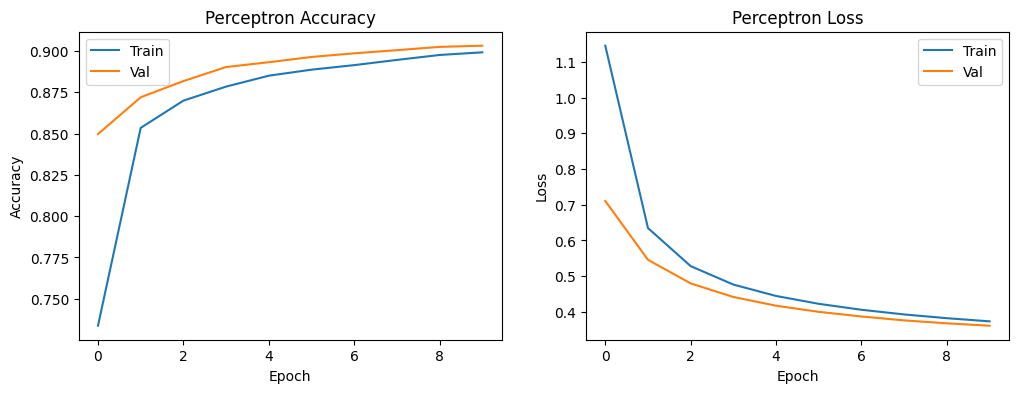

In [42]:
plot_training(history_precp, "Perceptron")

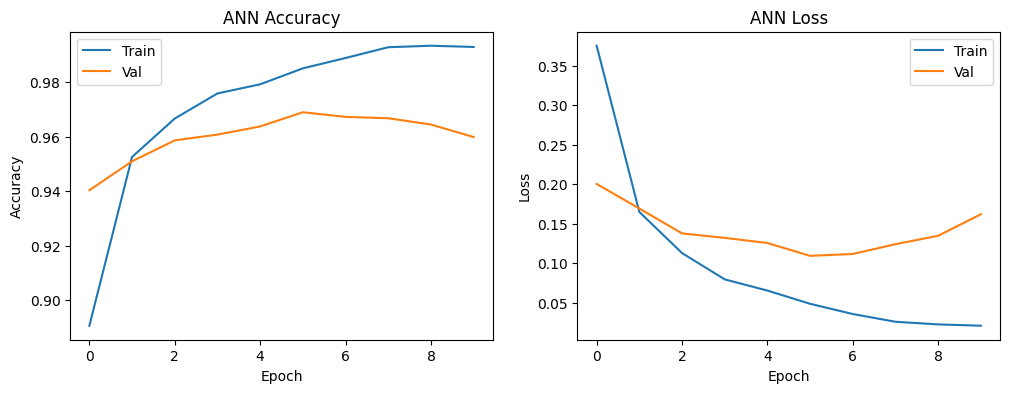

In [43]:
plot_training(history_ann, "ANN")

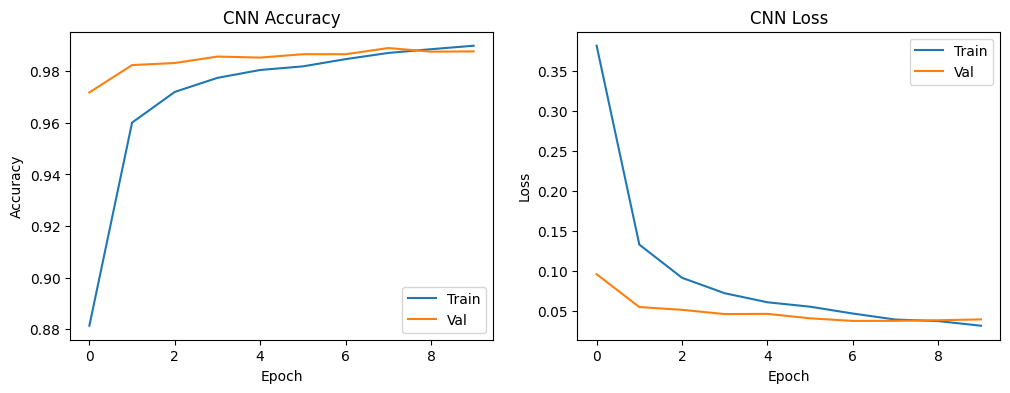

In [44]:
plot_training(history_cnn, "CNN")

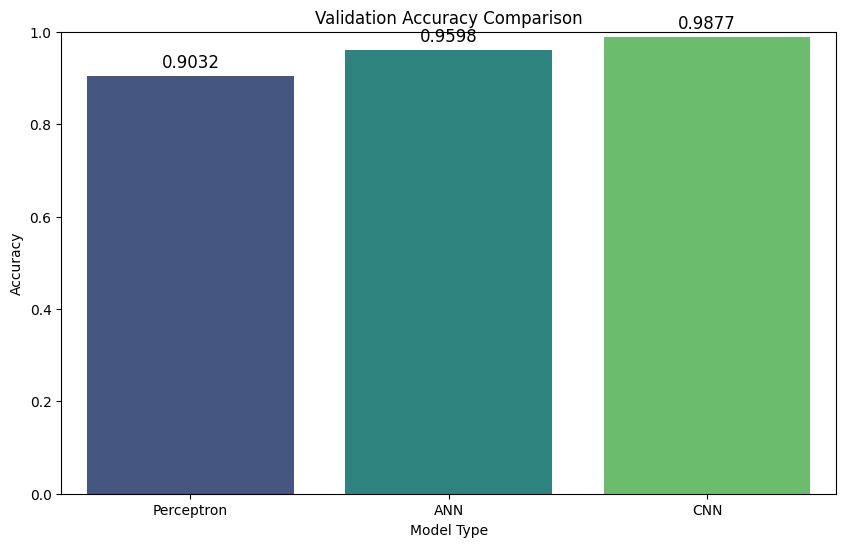

In [46]:
models = ['Perceptron', 'ANN', 'CNN']
accuracies = [acc_precp, acc_ann, acc_cnn]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1.0)
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model Type')

# Adding text labels on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()

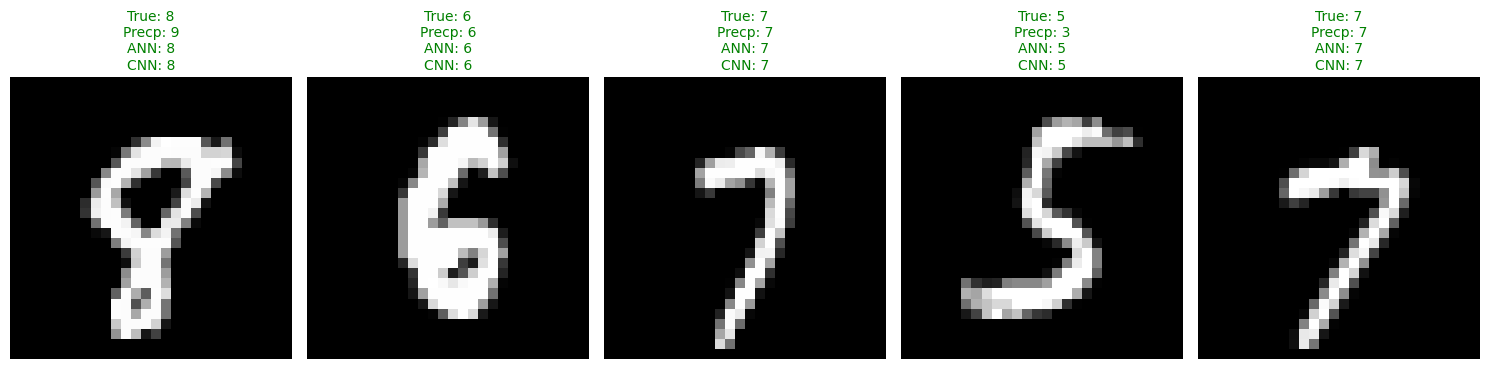

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Select 5 random indices from the test set
num_samples = 5
indices = np.random.choice(len(x_test_img), num_samples, replace=False)

# Get predictions from all three models
pred_precp = Perceptron.predict(x_test_img[indices], verbose=0)
pred_ann = ann.predict(x_test_img[indices], verbose=0)
pred_cnn = cnn.predict(X_test_cnn[indices], verbose=0)

# Convert probabilities to class labels
labels_precp = np.argmax(pred_precp, axis=1)
labels_ann = np.argmax(pred_ann, axis=1)
labels_cnn = np.argmax(pred_cnn, axis=1)

# Visualize the images and predictions
plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test_img[idx], cmap='gray')

    # Determine title color based on CNN prediction accuracy
    color = 'green' if labels_cnn[i] == y_test[idx] else 'red'

    title = f"True: {y_test[idx]}\nPrecp: {labels_precp[i]}\nANN: {labels_ann[i]}\nCNN: {labels_cnn[i]}"
    plt.title(title, color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Task
Analyze the performance of the trained Perceptron, ANN, and CNN models by first plotting the class distribution of the training labels from "/content/sample_data/mnist_train_small.csv" to check for balance. Then, generate and display confusion matrices for all three models using the test data from "/content/sample_data/mnist_test.csv" to identify common misclassifications. Additionally, visualize several images that the CNN model incorrectly predicted to gain insights into its errors. Finally, summarize the overall results and model comparisons.

## Plot Class Distribution

### Subtask:
Visualize the distribution of digit labels in the training dataset to assess class balance.


**Reasoning**:
The user wants to visualize the distribution of digit labels in the training set to check for class balance. I will use seaborn's countplot on the existing `y_train` array.



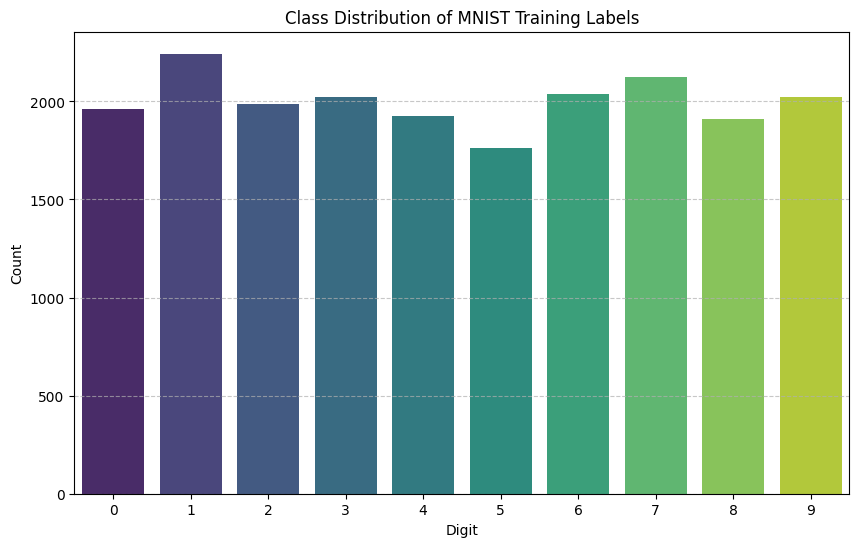

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution of MNIST Training Labels')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Generate Confusion Matrices

### Subtask:
Compute and visualize confusion matrices for the Perceptron, ANN, and CNN models to identify common misclassifications.


### Reasoning:
To analyze where our models are making mistakes, we will compute and visualize confusion matrices for each. This involves predicting labels for the entire test set, converting those predictions from probability distributions to class labels, and comparing them against the ground truth using a heatmap.

**Reasoning**:
I will compute the predictions for all three models on the test set, convert them to class labels, and then visualize their confusion matrices side-by-side using seaborn heatmaps to identify common misclassifications.



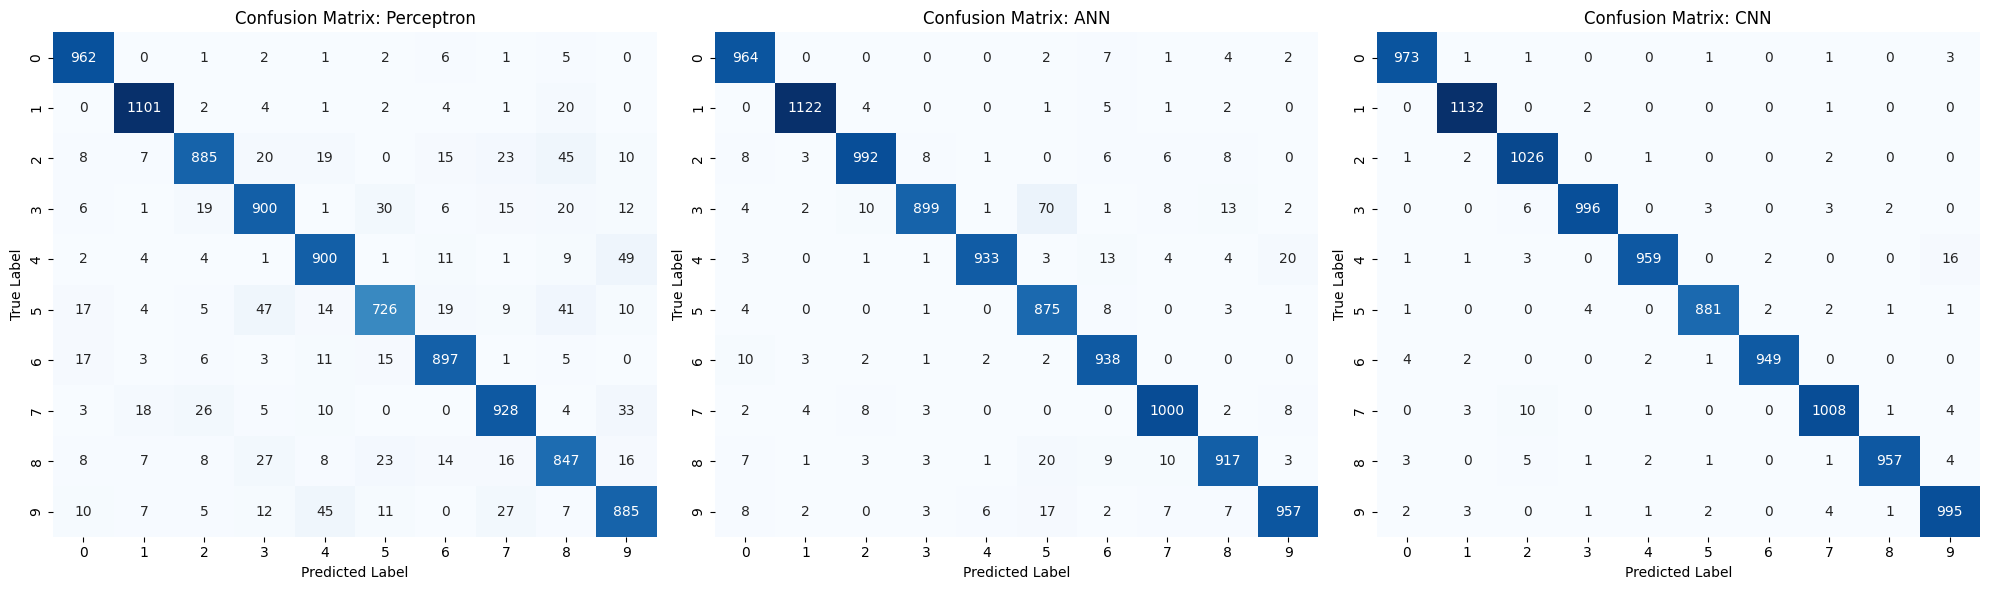

In [51]:
from sklearn.metrics import confusion_matrix

# 1. Generate predictions
pred_probs_precp = Perceptron.predict(x_test_img, verbose=0)
pred_probs_ann = ann.predict(x_test_img, verbose=0)
pred_probs_cnn = cnn.predict(X_test_cnn, verbose=0)

# 2. Convert probabilities to class labels
y_pred_precp = np.argmax(pred_probs_precp, axis=1)
y_pred_ann = np.argmax(pred_probs_ann, axis=1)
y_pred_cnn = np.argmax(pred_probs_cnn, axis=1)

# 3. Compute confusion matrices
cm_precp = confusion_matrix(y_test, y_pred_precp)
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

# 4. Visualize the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

models_cm = [(cm_precp, 'Perceptron'), (cm_ann, 'ANN'), (cm_cnn, 'CNN')]

for i, (cm, title) in enumerate(models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'Confusion Matrix: {title}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

## Visualize Misclassified Examples

### Subtask:
Identify and display images from the test set that the CNN model incorrectly predicted to understand the types of errors it makes.


**Reasoning**:
I will identify the indices where the CNN model made incorrect predictions and visualize the first 10 of these misclassified images along with their true and predicted labels.



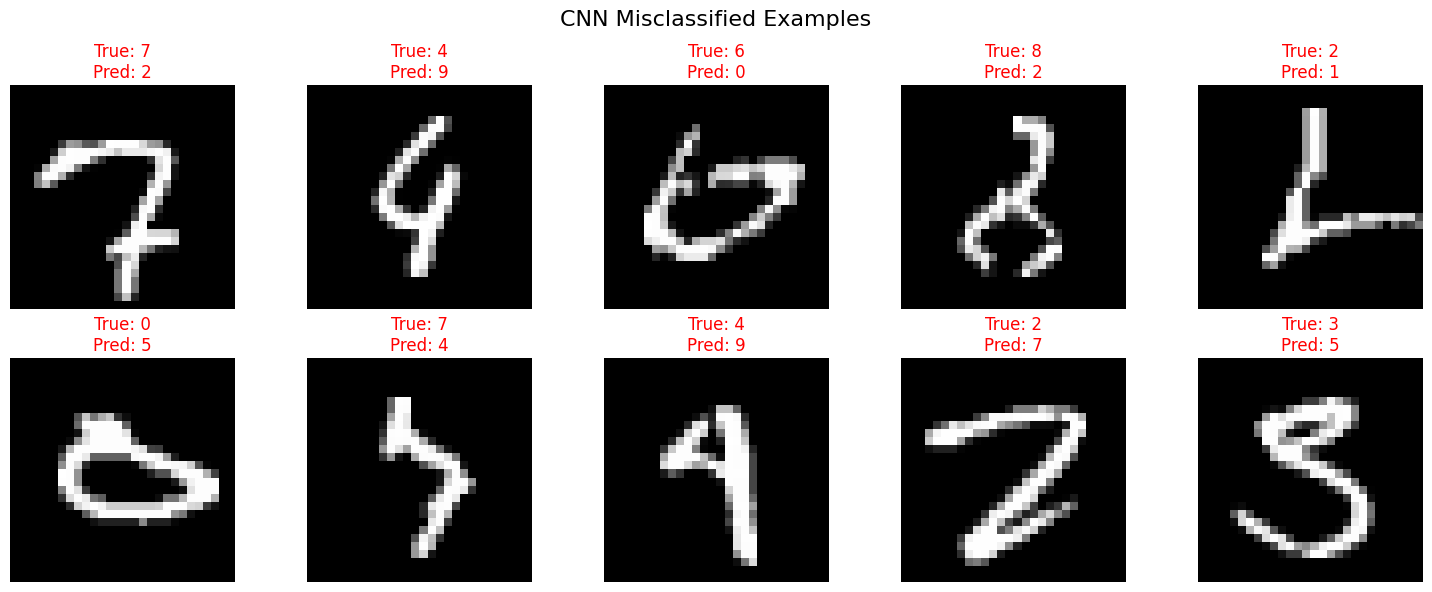

Total misclassified by CNN: 123 out of 9999


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Identify indices where predictions are incorrect
misclassified_indices = np.where(y_pred_cnn != y_test)[0]

# 2. Select a subset (e.g., the first 10 samples)
num_to_show = 10
sample_indices = misclassified_indices[:num_to_show]

# 3. Create a grid of subplots
plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_img[idx], cmap='gray')

    true_label = y_test[idx]
    pred_label = y_pred_cnn[idx]

    plt.title(f'True: {true_label}\nPred: {pred_label}', color='red')
    plt.axis('off')

plt.suptitle('CNN Misclassified Examples', fontsize=16)
plt.tight_layout()
plt.show()

print(f'Total misclassified by CNN: {len(misclassified_indices)} out of {len(y_test)}')